# Calories Burned Prediction

# **Libraries**

In [121]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# **Dataset**

Data Collection and Preprocessing

In [67]:
#load the calories dataset from csv file into the dataframe 
caloroies_df = pd.read_csv('/content/calories.csv')

In [68]:
#load the exercise dataset from csv file into the dataframe 
exercise_df = pd.read_csv('/content/exercise.csv')

In [69]:
#print first 10 rows from the loaded dataset - Calories
caloroies_df.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [70]:
#print first 10 rows from the loaded dataset - Exericse
exercise_df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


**Combine Above 2 Dataframes into one dataframe**

In [71]:
combined_df = pd.concat([exercise_df, caloroies_df['Calories']], axis=1)

In [72]:
#print first 20 rows from the loaded dataset - combined dataframe
combined_df.head(20)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


Count the Column and rows in Combined dataframe

In [73]:
#count the columns and rows  
combined_df.shape

(15000, 9)

In [74]:
#Display all the data types 
combined_df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [75]:
#Display all information about combined data frame
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [76]:
# checking for missing values
combined_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# **Data Analyze & Exploration**

In [77]:
# Display measuers of the combined dataframe 
combined_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# **Data Visualizing**


In [78]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


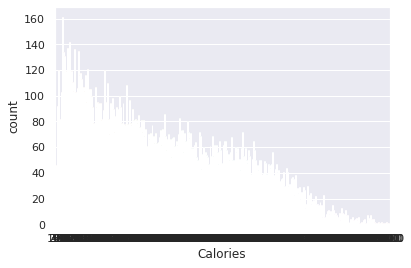

In [79]:
# Plot the Calories column using count plot
sns.countplot(combined_df['Calories'])

In [80]:

categorize_data = combined_df.columns[combined_df.dtypes == object]
categorize_data

Index(['Gender'], dtype='object')

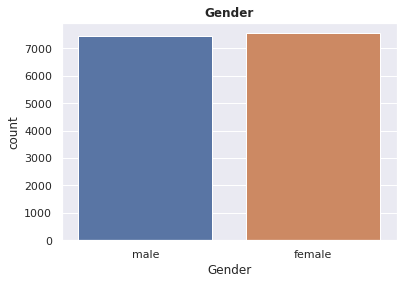

In [81]:
#plot Gender column
combined_Data =combined_df.copy()
for col in categorize_data:
    
    plt.title(col, fontsize=12, fontweight="bold")
    sns.countplot(x=col, data=combined_Data)
    plt.show()

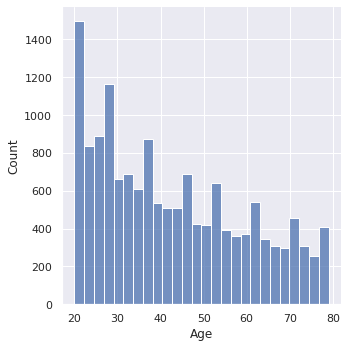

In [82]:
# Getting the distribution of "Age" column
# plt.plot(combined_df['Age'])
sns.displot(combined_df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


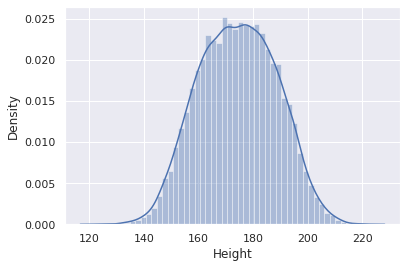

In [83]:
# Getting the distribution of "Height" column
sns.distplot(combined_df['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


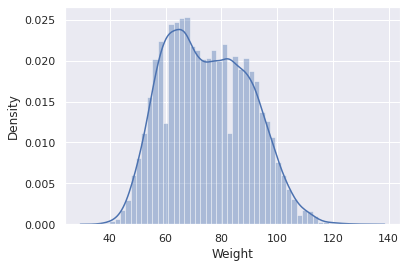

In [84]:
# Getting the distribution of "Weight" column
sns.distplot(combined_df['Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


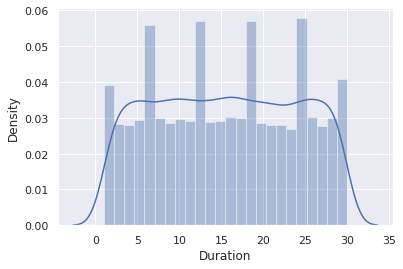

In [85]:
# Getting the distribution of "Weight" column
sns.distplot(combined_df['Duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


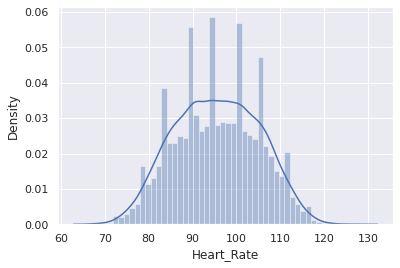

In [86]:
# Getting the distribution of "Heart_Rate" column
sns.distplot(combined_df['Heart_Rate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


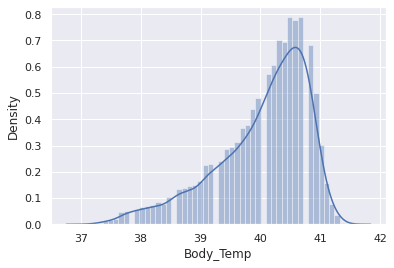

In [87]:
# Getting the distribution of "Body_Temp" column
sns.distplot(combined_df['Body_Temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


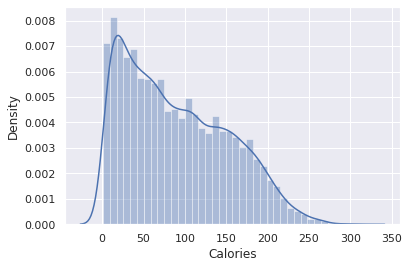

In [88]:
# Getting the distribution of "Body_Temp" column
sns.distplot(combined_df['Calories'])

In [89]:
sns.set()

# **Correlation Heatmap**

Getting the Correlation in the dataset

*   Positive Correlation
*   Negative Correlation



In [90]:
combined_df.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


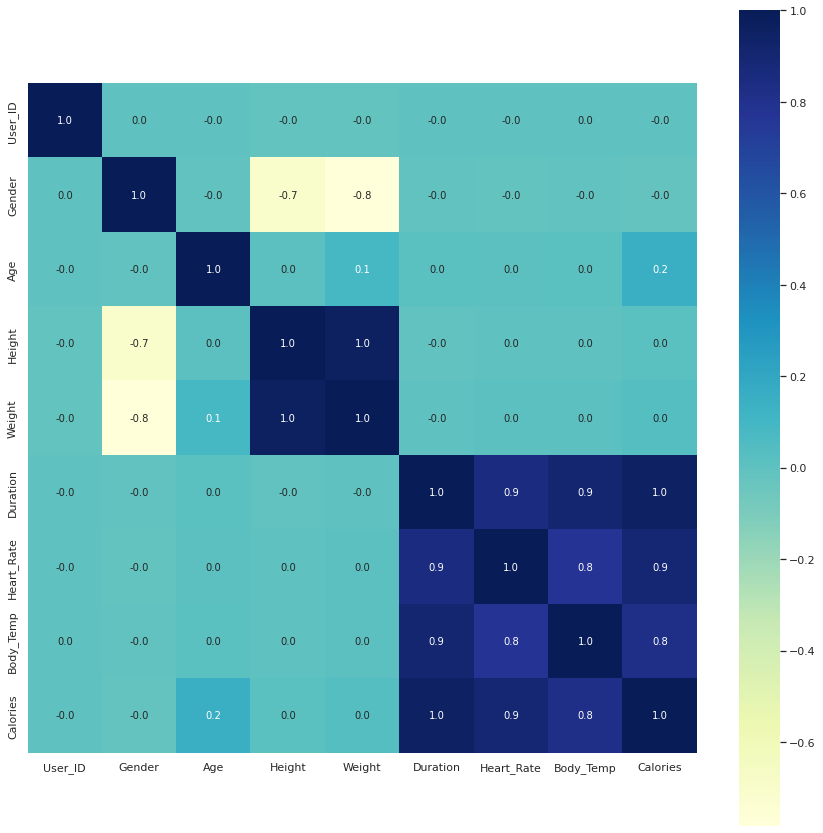

In [116]:
# Bulding a heatmap to understand the correlation

plt.figure(figsize=(15,15))
sns.heatmap(combined_df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='YlGnBu')

**Converting the text data into the numerical values**

In [96]:
#Replace numerical values for the Gender - Male:0 , Female:1
combined_df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [97]:
#Display the Updated Dataframe 
combined_df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,1,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,0,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,0,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,1,26,146.0,51.0,16.0,90.0,40.2,72.0


**Separating features and Target**

In [122]:
A = combined_df.drop(columns=['User_ID','Calories'], axis=1)
B = combined_df['Calories']

In [123]:
#Display Dataframe without UserID
print(A)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [129]:
#Display Dataframe only Calories
print(B)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


**Splitting the data into training data and Test data**

In [130]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=2)

In [131]:
print(A.shape, A_train.shape, A_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# **Model Training**

XGBoost Regressor

In [127]:
# load the XGRegressor model
regressor_model = XGBRegressor()

In [128]:
# training the model with A_train
regressor_model.fit(A_train, B_train)

[19:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# **Evaluating the Model**

**Prediction on Test Data**

In [117]:
#predict the data by using regressor model
test_data_prediction = regressor_model.predict(A_test)

In [112]:
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


**Mean Absolute Error of the model**

In [118]:
#create mean error by using test and the prediction
mean_error = metrics.mean_absolute_error(B_test, test_data_prediction)

In [119]:
print("The Mean Absolute Error = ", mean_error)

The Mean Absolute Error =  2.7159012502233186
